# CatBoost

`pip install catboost`


In [1]:
import os, sys, pathlib

UTILS_FOLDER = "T00 - Utils"
curPath = os.getcwd()
parPath = pathlib.Path(curPath).parent
utilPath = os.path.join(parPath, UTILS_FOLDER)
for p in [curPath, str(parPath), utilPath]:
    sys.path.append(p)

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from utils import plot_ds
from lightgbm import LGBMClassifier

In [3]:
# Read data
iris = datasets.load_iris()

# Extract the last 2 columns
X = iris.data[:, 2:4]
y = iris.target

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
# Model
lgb = LGBMClassifier(n_estimators=100)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 105, number of used features: 2
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

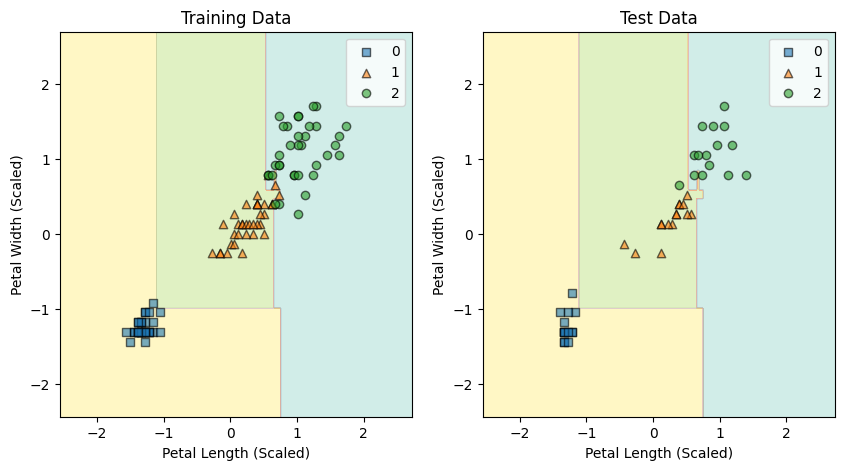

In [5]:
# Training
lgb.fit(X_train_std, y_train)

# Prediction
y_pred = lgb.predict(X_test_std)

# Misclassification from the test samples
sumMiss = (y_test != y_pred).sum()

# Accuracy score from the test samples
accuracyScore = accuracy_score(y_test, y_pred)

print(f"Misclassified examples: {sumMiss}")
print(f"Accuracy score: {accuracyScore}")

# Plot decision regions
plot_ds(X_train_std, X_test_std, y_train, y_test, lgb)

In [6]:
y_pred.flatten()

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])